In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('D:\p\ML Project - Decision Tree Airline Customer Satisfaction U16955468980.csv.txt')

In [3]:
data

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,9996,9996,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,9997,9997,14057,Female,Loyal Customer,39,Business travel,Business,319,4,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,9998,9998,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,...,4,4,3,4,5,4,5,1,11.0,satisfied


In [4]:
data.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [5]:
col=data.columns
col

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
# number columns

In [7]:
des_columns='id	Age	Flight Distance	Inflight wifi service	Departure/Arrival time convenient	Ease of Online booking	Gate location	Food and drink	Online boarding	Seat comfort	Inflight entertainment	On-board service	Leg room service	Baggage handling	Checkin service	Inflight service	Cleanliness	Departure Delay in Minutes	Arrival Delay in Minutes'
no_columns=des_columns.split('\t')

In [8]:
# if there is outlier (with the help of std>mean)

In [9]:
print('Has outlier:-')
print('')
for i in no_columns:
    if data[i].mean()<data[i].std():
        print(i)


Has outlier:-

Departure Delay in Minutes
Arrival Delay in Minutes


In [10]:
type(col)

pandas.core.indexes.base.Index

In [11]:
col

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [13]:
col=pd.DataFrame(col)
col.replace('\s','_',regex=True,inplace=True)
data=pd.DataFrame(data,columns=pd.Index(col[0]))
pd.Index(col[0])

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object', name=0)

In [14]:
data['satisfaction'].replace(['neutral or dissatisfied','satisfied'],[0,1],inplace=True)

In [15]:
data['satisfaction'].value_counts()

satisfaction
0    5689
1    4311
Name: count, dtype: int64

D:\T\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\T\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='satisfaction', ylabel='Density'>

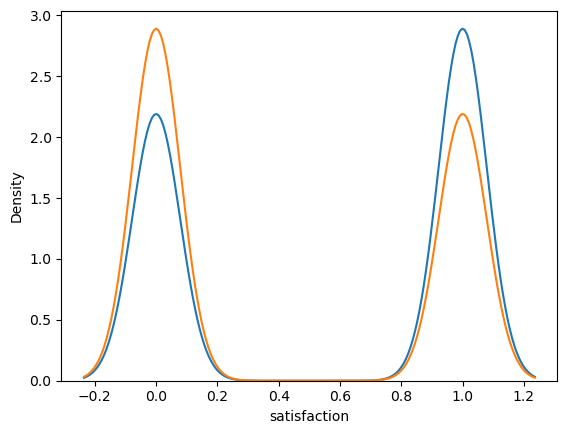

In [16]:
sns.kdeplot(data['satisfaction']== 0)
sns.kdeplot(data['satisfaction']== 1)

<Axes: xlabel='satisfaction'>

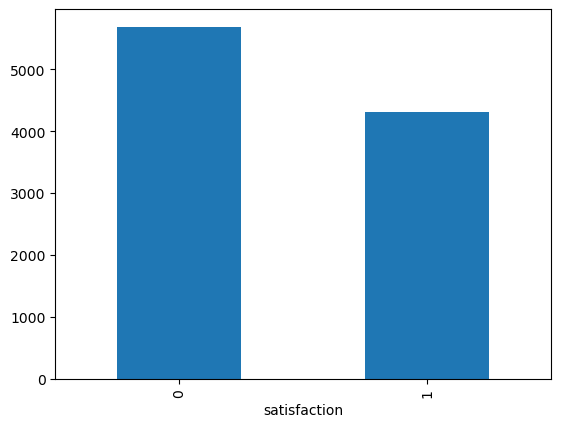

In [17]:
data['satisfaction'].value_counts().plot(kind='bar')

In [22]:
total_data_count=(data['id'].count())

In [29]:
total_data_count

10000

In [27]:
data['Gender'].value_counts().iloc[0]

5108

In [23]:
data[(data['Gender'] == 'Male') & (data['satisfaction']== 1)]['satisfaction'].count()

2143

In [32]:
data[(data['Gender'] == 'Male') & (data['satisfaction']== 1)]['satisfaction'].count()/data['Gender'].value_counts().iloc[1]

0.4380621422730989

In [33]:
data[(data['Gender'] == 'Female') & (data['satisfaction']== 1)]['satisfaction'].count()/data['Gender'].value_counts().iloc[0]

0.4244322631166797

<Axes: >

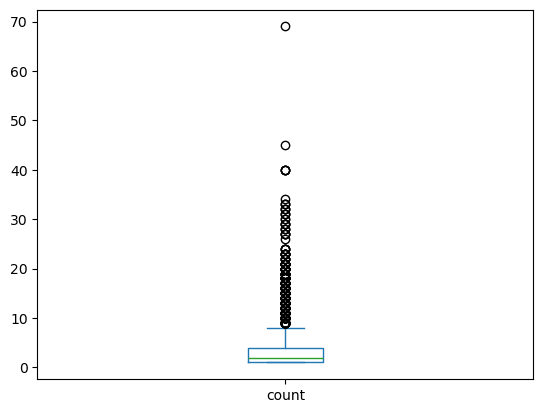

In [36]:
data['Flight_Distance'].value_counts().plot(kind='box')

<Axes: >

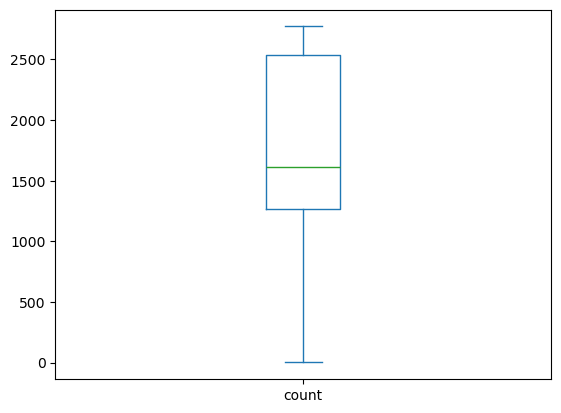

In [39]:
data['Checkin_service'].value_counts().plot(kind='box')

In [44]:
data.isnull().sum()

0
id                                    0
Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             26
satisfaction                          0
dtype: int64

In [46]:
data.dropna(inplace=True)

In [49]:
data['Flight_Distance'].unique()

array([ 460,  235, 1142, ..., 3033, 1319, 1443], dtype=int64)

In [10]:
data['z-score_Dep']=(data['Departure_Delay_in_Minutes']-data['Departure_Delay_in_Minutes'].mean())/data['Departure_Delay_in_Minutes'].std()

In [11]:
data[(data['z-score_Dep']>3) | (data['z-score_Dep']< -3)]

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,z-score_Dep
168,13884,Male,Loyal Customer,49,Business travel,Eco,578,5,1,1,...,1,1,4,5,4,5,162,179.0,1,3.852020
178,69692,Male,Loyal Customer,42,Business travel,Business,1372,3,3,5,...,4,5,4,4,3,4,141,125.0,1,3.302533
278,103291,Male,Loyal Customer,40,Business travel,Business,1959,3,3,3,...,3,5,5,4,5,4,209,191.0,1,5.081823
282,26149,Male,disloyal Customer,26,Business travel,Eco,406,3,5,3,...,5,4,1,3,4,3,149,138.0,0,3.511862
340,79924,Male,Loyal Customer,25,Business travel,Business,1796,4,2,2,...,5,3,3,4,2,4,176,164.0,0,4.218344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9820,21356,Female,Loyal Customer,52,Personal Travel,Eco,674,3,5,3,...,2,5,5,5,5,5,132,121.0,0,3.067039
9906,44257,Female,Loyal Customer,33,Personal Travel,Eco,359,3,4,3,...,4,4,4,1,3,1,245,228.0,0,6.023799
9961,19321,Male,Loyal Customer,23,Business travel,Business,1556,1,1,1,...,2,3,3,5,4,5,167,174.0,1,3.982850
9969,72934,Male,Loyal Customer,46,Business travel,Business,3033,4,4,4,...,2,5,5,4,5,4,243,244.0,1,5.971467


In [12]:
data_o=data[(data['z-score_Dep'] < 3) & (data['z-score_Dep'] > -3)]

In [13]:
data_o['z-score_arr']=(data_o['Arrival_Delay_in_Minutes']-data_o['Arrival_Delay_in_Minutes'].mean())/data_o['Arrival_Delay_in_Minutes'].std()

C:\Users\B\AppData\Local\Temp\ipykernel_12768\548527327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_o['z-score_arr']=(data_o['Arrival_Delay_in_Minutes']-data_o['Arrival_Delay_in_Minutes'].mean())/data_o['Arrival_Delay_in_Minutes'].std()


In [14]:
data_o[(data_o['z-score_arr']>3) | (data_o['z-score_arr']< -3)]

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,z-score_Dep,z-score_arr
32,70594,Female,Loyal Customer,35,Business travel,Business,2611,4,5,4,...,4,5,4,3,4,109,120.0,1,2.465221,4.894272
113,23400,Male,Loyal Customer,20,Personal Travel,Eco,483,2,3,2,...,2,3,2,4,5,91,82.0,0,1.994233,3.187306
156,112483,Male,Loyal Customer,13,Personal Travel,Eco,853,1,4,1,...,2,5,4,4,4,105,122.0,0,2.360557,4.984113
214,80520,Male,Loyal Customer,23,Personal Travel,Eco,1749,2,1,1,...,1,4,2,3,3,97,89.0,0,2.151229,3.501747
236,19790,Female,Loyal Customer,65,Personal Travel,Eco,578,2,4,3,...,3,3,4,3,3,99,101.0,0,2.203561,4.040789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9772,30681,Male,Loyal Customer,25,Business travel,Business,2101,2,2,2,...,1,3,5,1,5,98,113.0,1,2.177395,4.579831
9786,16651,Male,disloyal Customer,24,Business travel,Eco,488,1,0,1,...,5,5,1,2,4,106,90.0,0,2.386723,3.546667
9842,48423,Female,disloyal Customer,28,Business travel,Eco,948,4,4,4,...,1,4,1,5,5,92,91.0,1,2.020399,3.591587
9844,57125,Female,Loyal Customer,35,Personal Travel,Eco,1222,3,3,3,...,5,3,1,2,1,100,91.0,0,2.229727,3.591587


In [15]:
data_o=data_o[(data_o['z-score_arr'] < 3 ) & (data_o['z-score_arr'] > -3)]

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
encoder=LabelEncoder()

In [52]:
data[['Gender','Customer_Type','Type_of_Travel','Class']]=data[['Gender','Customer_Type','Type_of_Travel','Class']].apply(encoder.fit_transform)

In [63]:
data.drop('id',axis=1,inplace=True)

In [64]:
x=data.drop('satisfaction',axis=1)

y=data['satisfaction']

In [69]:
data.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object', name=0)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler=StandardScaler()

In [75]:
x.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes'],
      dtype='object', name=0)

In [77]:
xs=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(xs,y,train_size=0.8,random_state=0)

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
model=DecisionTreeClassifier(max_depth=20)

In [140]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [141]:
model.score(x_train,y_train)

0.9998746710114049

In [143]:
model.score(x_test,y_test)

0.9233082706766917

In [126]:
y_prediced=model.predict(x_test)

In [127]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,classification_report,confusion_matrix,f1_score

In [128]:
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [129]:
def fun(x_train,x_test,y_train,y_test,y_prediced):
    print('Accuracy Score : - ',end=' ')
    print( accuracy_score(y_test,y_prediced))
    
    print('precision_score : - ',end=' ')
    print(precision_score(y_test,y_prediced))

    print('recall_score : - ',end=' ')
    print( recall_score(y_test,y_prediced))
    
    print('f1_score : - ',end=' ')
    print(f1_score(y_test,y_prediced))
    
    print('Classification_report : - ')
    print('')
    print( classification_report(y_test,y_prediced))
    
    print('confusion_matirx : - ')
    print('')
    print(confusion_matrix(y_test,y_prediced))

In [130]:
fun(x_train,x_test,y_train,y_test,y_prediced)

Accuracy Score : -  0.9218045112781955
precision_score : -  0.921875
recall_score : -  0.8939393939393939
f1_score : -  0.9076923076923077
Classification_report : - 

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1137
           1       0.92      0.89      0.91       858

    accuracy                           0.92      1995
   macro avg       0.92      0.92      0.92      1995
weighted avg       0.92      0.92      0.92      1995

confusion_matirx : - 

[[1072   65]
 [  91  767]]
